In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [8]:
df = pd.read_csv('churn_true.csv')
df

,Unnamed: 0,Phone_Number,Account_Length,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,...,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn,Cluster,PCA1,PCA2,Day_Eve_Charge_Ratio,Night_Intl_Charge_Ratio
0,8,329-6603,65,0,129.1,137,21.95,228.5,83,19.42,...,12.7,6,3.43,4,True,1,-2.335098,-0.681739,1.130278,2.740525
1,12,351-7269,161,0,332.9,67,56.59,317.8,97,27.01,...,5.4,9,1.46,4,True,1,-0.011146,0.556287,2.095150,4.952055
2,17,393-7984,77,0,62.4,89,10.61,169.9,121,14.44,...,5.7,6,1.54,5,True,1,-4.273185,-0.064077,0.734765,6.123377
3,26,360-1596,12,0,249.6,118,42.43,252.4,119,21.45,...,11.8,3,3.19,1,True,1,-0.473658,0.186126,1.978089,3.952978
4,39,398-1294,119,0,159.1,114,27.05,231.3,117,19.66,...,8.8,3,2.38,5,True,1,-2.859719,-0.742749,1.375890,2.705882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4148,33176,769-9777,98,0,268.8,82,28.22,286.2,222,22.88,...,22.8,2,8.22,2,True,0,1.123364,-1.177309,1.233392,1.092457
4149,33190,766-8785,26,0,229.6,28,89.08,208.2,208,22.28,...,20.8,2,2.92,0,True,0,-0.063786,-1.694523,3.998205,0.780822
4150,33192,797-7979,92,0,282.2,208,89.88,229.8,209,28.22,...,2.0,2,0.82,2,True,0,0.904715,4.463308,3.184975,25.390244
4151,33194,787-9998,66,0,262.8,92,28.22,280.0,68,29.88,...,20.6,8,2.86,2,True,1,0.484861,0.128087,0.944444,3.034965


In [9]:
# Ensure 'Churn' column is properly formatted
df['Churn'] = df['Churn'].astype(int)

In [10]:
# Select relevant numerical columns for clustering
numerical_cols = [
    'Account_Length', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 
    'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 
    'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls'
]

X = df[numerical_cols]

In [11]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In hierarchical clustering, the elbow method isn't directly applicable since hierarchical clustering doesn't involve specifying a number of clusters upfront. However, you can still use the elbow method by first performing KMeans clustering to determine the optimal number of clusters and then applying that number of clusters in the hierarchical clustering step.

In [14]:
# Generate the linkage matrix
linked = linkage(X_scaled, method='ward')

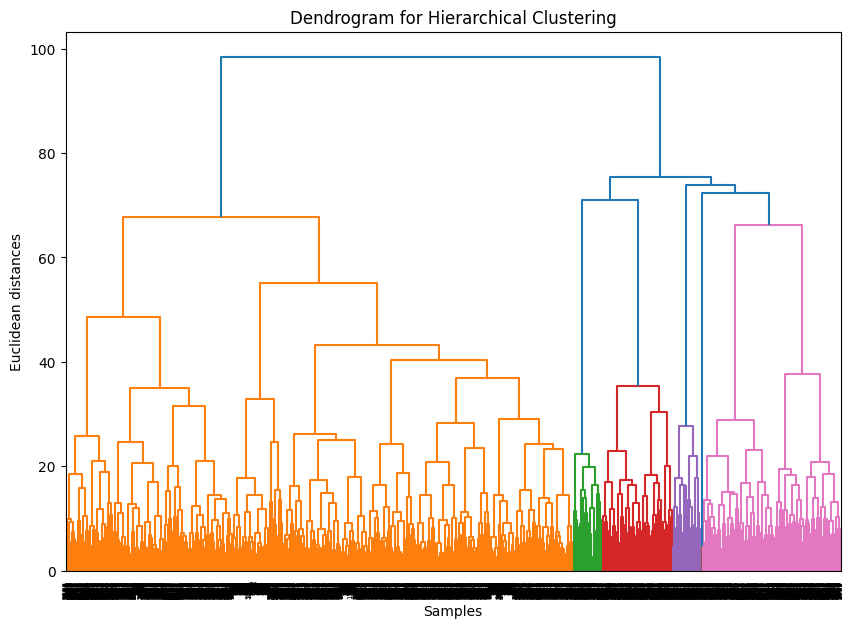

In [15]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [16]:
# Choosing the number of clusters from the dendrogram, e.g., 3 for illustration purposes
optimal_clusters = 3
hierarchical_cluster = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
df['Cluster'] = hierarchical_cluster.fit_predict(X_scaled)

In [17]:
# Visualize the clusters using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

In [18]:
# Calculate Customer Lifetime Value (CLV)
df['CLV'] = df['Day_Charge'] + df['Eve_Charge'] + df['Night_Charge'] + df['Intl_Charge']

In [19]:
# Define cluster names based on your analysis
cluster_names = {
    0: 'Potential Low Value Customers',
    1: 'Potential Medium Value Customers',
    2: 'Potential High Value Customers'
}

# Map clusters to descriptive names
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

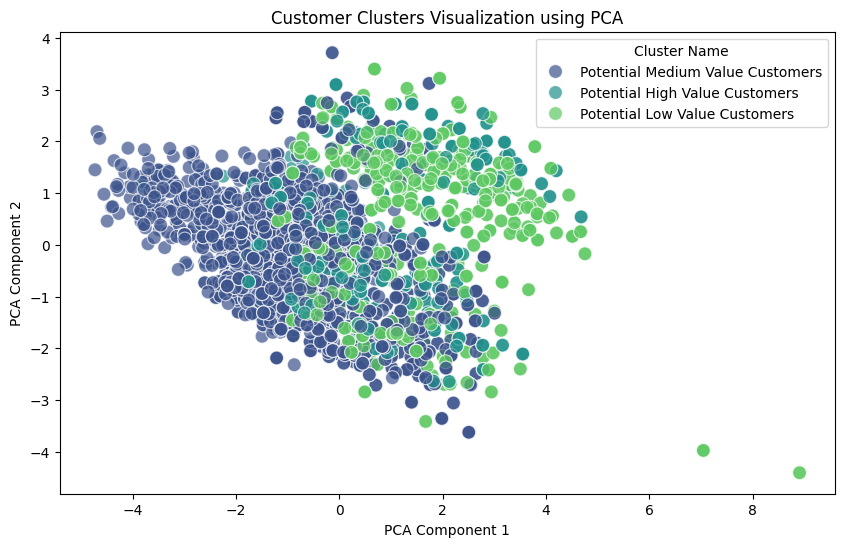

In [20]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Name', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Customer Clusters Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster Name', loc='best')
plt.show()

In [21]:
# Cluster analysis: describe statistics and CLV
cluster_analysis = {}
for i in range(optimal_clusters):
    cluster_name = cluster_names.get(i, f'Cluster {i}')
    cluster_data = df[df['Cluster'] == i][numerical_cols].describe()
    cluster_clv_mean = df[df['Cluster'] == i]['CLV'].mean()
    churn_rate = df[df['Cluster'] == i]['Churn'].mean() * 100  # Convert to percentage
    cluster_analysis[cluster_name] = {
        'Data Description': cluster_data,
        'Average CLV': cluster_clv_mean,
        'Churn Rate': churn_rate
    }

In [22]:
# Count the number of records in each cluster
cluster_counts = df['Cluster_Name'].value_counts()

In [23]:
# Results
print("Cluster Analysis Summary:")
for cluster_name, analysis in cluster_analysis.items():
    print(f"\n{cluster_name}:\n")
    print(analysis['Data Description'])
    print(f"Average CLV: {analysis['Average CLV']:.2f}")
    print(f"Churn Rate: {analysis['Churn Rate']:.2f}%")

print("\nNumber of Records in Each Cluster:")
print(cluster_counts)

Cluster Analysis Summary:

Potential Low Value Customers:

       Account_Length  VMail_Message    Day_Mins   Day_Calls  Day_Charge  \
count      897.000000     897.000000  897.000000  897.000000  897.000000   
mean       173.173913      17.239688  269.824114  177.100334   54.335165   
std        102.055662      30.821771   46.766849   92.208185   29.304836   
min         20.000000       0.000000   82.200000   22.000000   20.030000   
25%         82.000000       0.000000  228.200000   89.000000   28.220000   
50%        202.000000       0.000000  282.800000  202.000000   32.820000   
75%        268.000000      26.000000  298.000000  228.000000   82.880000   
max        329.000000      88.000000  329.900000  329.000000  112.011000   

         Eve_Mins   Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
count  897.000000  897.000000  897.000000  897.000000   897.000000   
mean   269.358863  165.104794   27.691609  267.662241   176.528428   
std     39.827657   94.475291   14.607547   40